<a href="https://colab.research.google.com/github/fealfaraj/llSPS-INT-175-Chronic-kidney-disease-analysis/blob/master/Copy_of_Yet_another_copy_of_Chronic_Kidney_Disease_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Import the Libraries

In [13]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#Importing the dataset

In [15]:
dataset = pd.read_csv("kidney_disease.csv")
dataset

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [16]:
dataset.columns

Index(['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc',
       'Rbcc', 'Htn', 'Class'],
      dtype='object')

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [18]:
dataset.isnull().any()

Bp       False
Sg       False
Al       False
Su       False
Rbc      False
Bu       False
Sc       False
Sod      False
Pot      False
Hemo     False
Wbcc     False
Rbcc     False
Htn      False
Class    False
dtype: bool

In [19]:
dataset.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

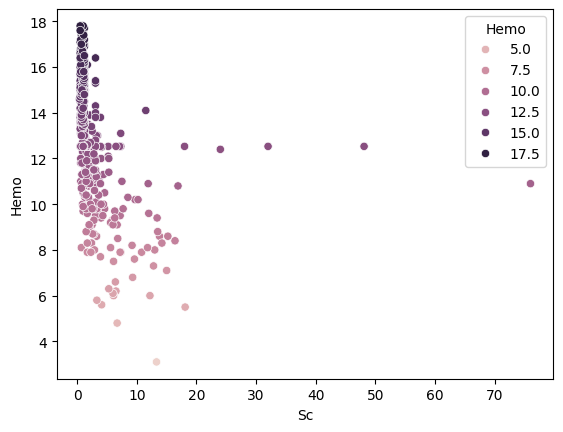

In [20]:
# prompt: Scatter plot of  Sc over Hemo with different color

import matplotlib.pyplot as plt
sns.scatterplot(x = "Sc", y = "Hemo", hue = "Hemo", data = dataset)
plt.show()


In [21]:
dataset.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [22]:
dataset['Al'].value_counts()

Al
0.0    199
1.0     90
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64

In [23]:
#Data Visualization

# Heat Map

<Axes: >

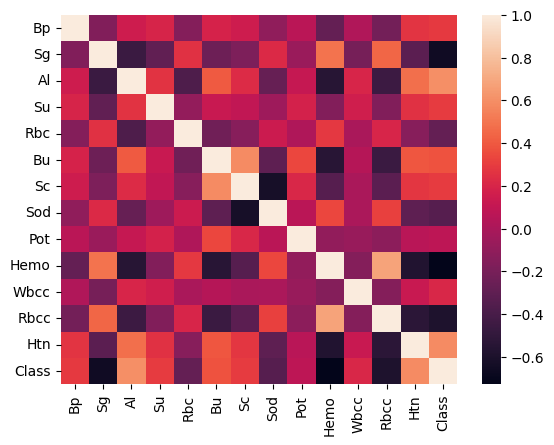

In [24]:
sns.heatmap(dataset.corr())

# Scatter plot

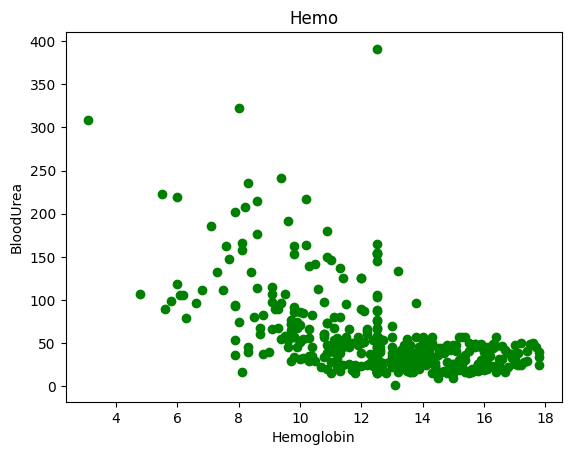

In [25]:


plt.scatter(dataset['Hemo'],dataset['Bu'],color='g')
plt.xlabel("Hemoglobin")
plt.ylabel("BloodUrea")
plt.title("Hemo")
plt.show()

# Pair plots

In [26]:
#sns.set(style="ticks", color_codes=True)
#sns.pairplot(dataset)

# Box plots

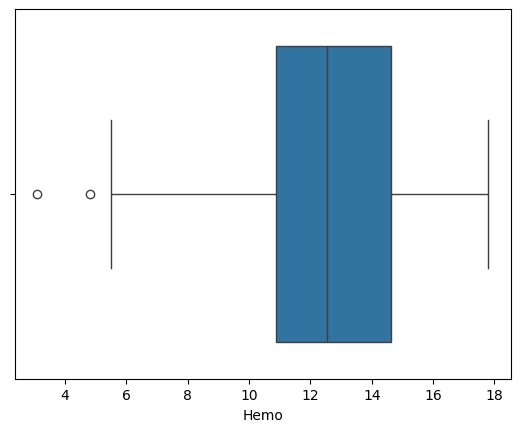

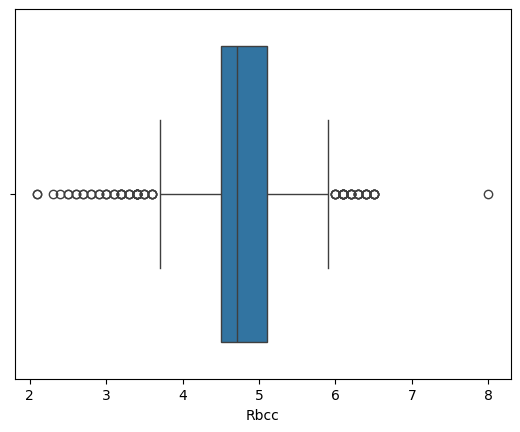

In [27]:
# prompt: draw box plots Hemo and Rbcc

import matplotlib.pyplot as plt
sns.boxplot(x = dataset["Hemo"])
plt.show()
sns.boxplot(x = dataset["Rbcc"])
plt.show()


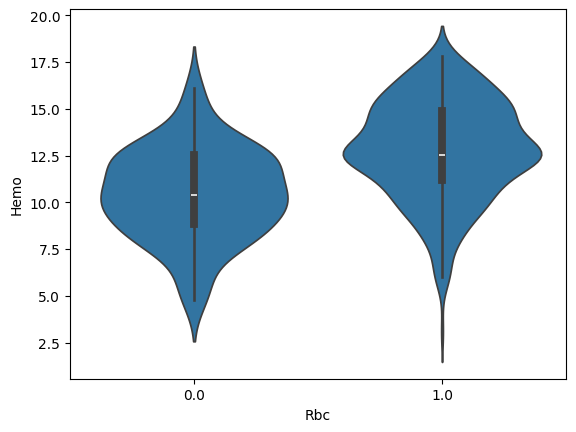

In [28]:
# prompt:  Violin plots Rbc and Hemo

import matplotlib.pyplot as plt
sns.violinplot(x=dataset["Rbc"], y=dataset["Hemo"])
plt.show()


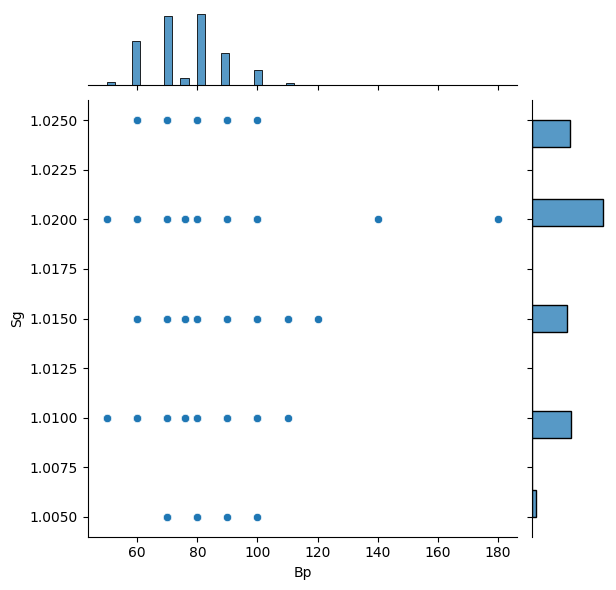

In [29]:
# prompt: Joint plot Bp and Sg

import matplotlib.pyplot as plt
sns.jointplot(x = "Bp", y = "Sg", data = dataset)
plt.show()


# Bar chart

<BarContainer object of 400 artists>

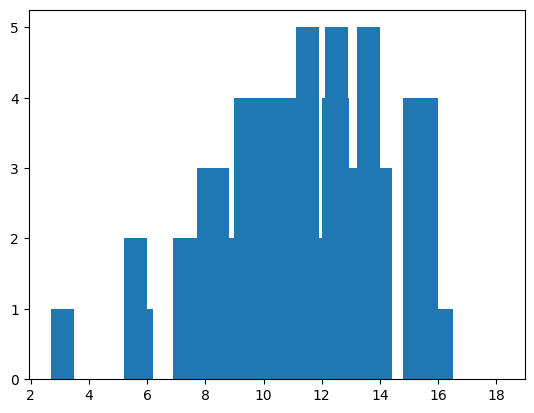

In [30]:
plt.bar(dataset['Hemo'],dataset['Su'])

# Line plots

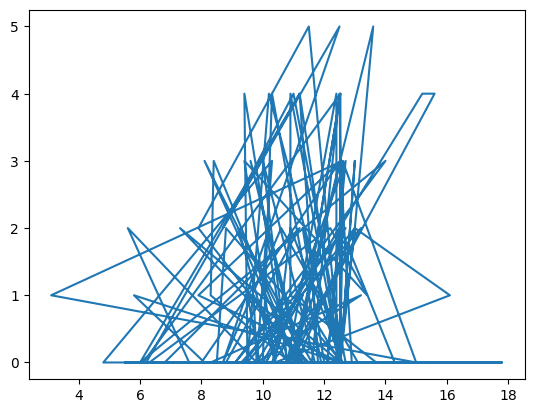

In [31]:
plt.plot(dataset['Hemo'],dataset['Su'])

In [32]:
dataset.drop('Sg',axis=1,inplace=True)

In [33]:
#Taking care of Missing Data

In [34]:
dataset['Rbc']=dataset['Rbc'].fillna(value=dataset['Rbc'].mode().iloc[0])
dataset

,Bp,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [35]:
dataset.isnull().any()

Bp       False
Al       False
Su       False
Rbc      False
Bu       False
Sc       False
Sod      False
Pot      False
Hemo     False
Wbcc     False
Rbcc     False
Htn      False
Class    False
dtype: bool

In [36]:
dataset['Al']=dataset['Al'].fillna(value=dataset['Al'].mean())
dataset['Su']=dataset['Su'].fillna(value=dataset['Su'].mean())
dataset['Bu']=dataset['Bu'].fillna(value=dataset['Bu'].mean())
dataset['Sc']=dataset['Sc'].fillna(value=dataset['Sc'].mean())
dataset['Pot']=dataset['Pot'].fillna(value=dataset['Pot'].mean())
dataset['Hemo']=dataset['Hemo'].fillna(value=dataset['Hemo'].mean())

In [37]:
dataset['Rbc']=dataset['Rbc'].fillna(value=dataset['Rbc'].mode().iloc[0])
dataset['Wbcc']=dataset['Wbcc'].fillna(value=dataset['Wbcc'].mode().iloc[0])
dataset['Rbcc']=dataset['Rbcc'].fillna(value=dataset['Rbcc'].mode().iloc[0])

In [38]:
dataset.Wbcc=dataset.Wbcc.replace("\t6200",6200)
dataset.Wbcc=dataset.Wbcc.replace("\t8400",8400)
dataset.Wbcc=dataset.Wbcc.replace("\t?",9800)
dataset.Rbc=dataset.Rbc.replace("\t43",43)
dataset.Rbc=dataset.Rbc.replace("\t?",41)
dataset.Rbcc=dataset.Rbcc.replace("\t?",5.2)
dataset['Wbcc'].value_counts()
dataset.Rbc=dataset.Rbc.astype(int)
dataset.Wbcc=dataset.Wbcc.astype(int)
dataset.Rbcc=dataset.Rbcc.astype(float)
dataset['Wbcc'].value_counts()

Wbcc
8406     106
9800      11
6700      10
9600       9
7200       9
        ... 
19100      1
12300      1
16700      1
14900      1
2600       1
Name: count, Length: 90, dtype: int64

In [39]:
#Label Encoding

In [40]:

dataset.Al = [ 1 if each == "present" else 0 for each in dataset.Al]
dataset.Su = [ 1 if each == "present" else 0 for each in dataset.Su]
dataset.Rbc = [ 1 if each == "present" else 0 for each in dataset.Rbc]
dataset.Bu = [ 1 if each == "present" else 0 for each in dataset.Bu]
dataset.Sc = [ 1 if each == "present" else 0 for each in dataset.Sc]
dataset.Sod = [ 1 if each == "present" else 0 for each in dataset.Sod]
dataset.Pot = [ 1 if each == "present" else 0 for each in dataset.Pot]
dataset.Hemo = [ 1 if each == "present" else 0 for each in dataset.Hemo]
dataset.Wbcc = [ 1 if each == "present" else 0 for each in dataset.Wbcc]
dataset

,Bp,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,0,0,0,0,0,0,0,0,0,5.20,1.0,1
1,50.0,0,0,0,0,0,0,0,0,0,4.71,0.0,1
2,80.0,0,0,0,0,0,0,0,0,0,4.71,0.0,1
3,70.0,0,0,0,0,0,0,0,0,0,3.90,1.0,1
4,80.0,0,0,0,0,0,0,0,0,0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,0,0,0,0,0,0,0,0,0,4.90,0.0,0
396,70.0,0,0,0,0,0,0,0,0,0,6.20,0.0,0
397,80.0,0,0,0,0,0,0,0,0,0,5.40,0.0,0
398,60.0,0,0,0,0,0,0,0,0,0,5.90,0.0,0


In [41]:
x=dataset.iloc[:,:14]
x

,Bp,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,0,0,0,0,0,0,0,0,0,5.20,1.0,1
1,50.0,0,0,0,0,0,0,0,0,0,4.71,0.0,1
2,80.0,0,0,0,0,0,0,0,0,0,4.71,0.0,1
3,70.0,0,0,0,0,0,0,0,0,0,3.90,1.0,1
4,80.0,0,0,0,0,0,0,0,0,0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,0,0,0,0,0,0,0,0,0,4.90,0.0,0
396,70.0,0,0,0,0,0,0,0,0,0,6.20,0.0,0
397,80.0,0,0,0,0,0,0,0,0,0,5.40,0.0,0
398,60.0,0,0,0,0,0,0,0,0,0,5.90,0.0,0


In [42]:
y=dataset.iloc[:,14:]
y

""
0
1
2
3
4
...
395
396
397
398


In [43]:
#Splitting Data into Train and Test

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [46]:
x_train.iloc[:,1:]

,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
39,0,0,0,0,0,0,0,0,0,4.20,1.0,1
167,0,0,0,0,0,0,0,0,0,4.71,0.0,1
383,0,0,0,0,0,0,0,0,0,5.00,0.0,0
221,0,0,0,0,0,0,0,0,0,4.71,1.0,1
351,0,0,0,0,0,0,0,0,0,4.70,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
255,0,0,0,0,0,0,0,0,0,6.30,0.0,0
72,0,0,0,0,0,0,0,0,0,4.71,1.0,1
396,0,0,0,0,0,0,0,0,0,6.20,0.0,0
235,0,0,0,0,0,0,0,0,0,4.71,0.0,1


In [47]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Accuracy of  DT 0.96
Precision of   DT 0.9473684210526315
Recall of  DT 0.9818181818181818
roc_auc of  DT 0.9575757575757576


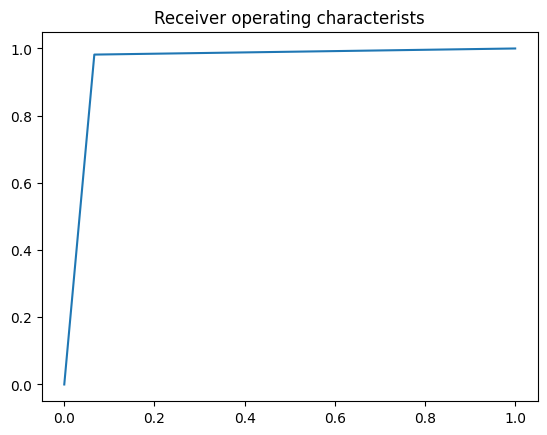

Accuracy of  RF 0.95
Precision of   RF 0.9166666666666666
Recall of  RF 1.0
roc_auc of  RF 0.9444444444444444


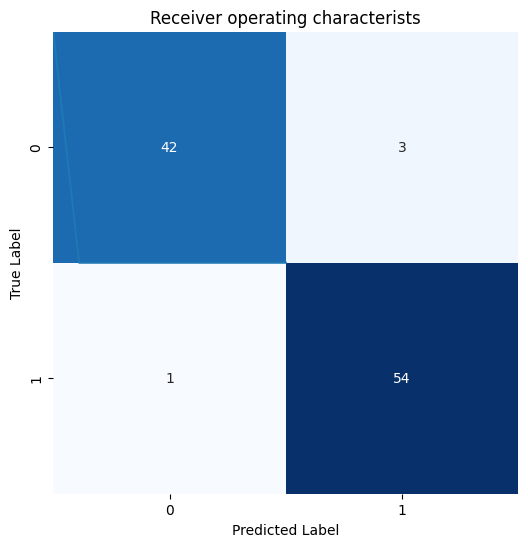

Accuracy of  XGB 0.95
Precision of   XGB 0.9310344827586207
Recall of  XGB 0.9818181818181818
roc_auc of  XGB 0.9464646464646465


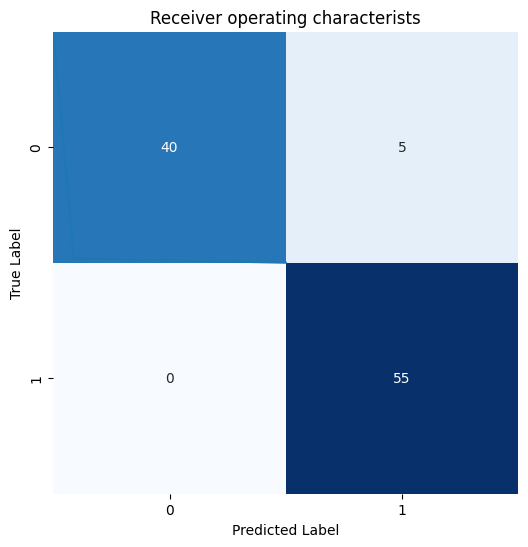

Accuracy of  SVM 0.55
Precision of   SVM 0.55
Recall of  SVM 1.0
roc_auc of  SVM 0.5


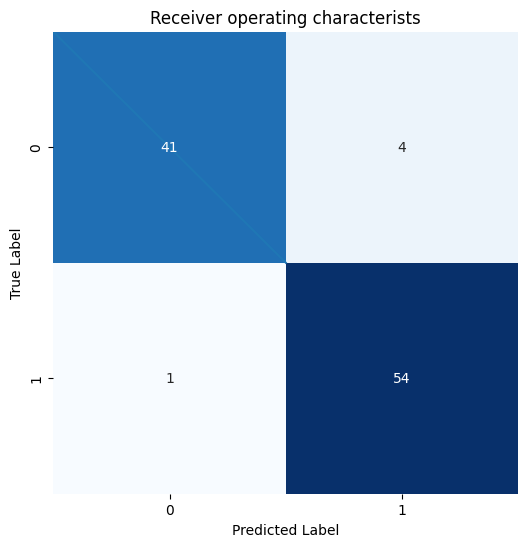

Accuracy of  KNN 0.93
Precision of   KNN 0.9
Recall of  KNN 0.9818181818181818
roc_auc of  KNN 0.9242424242424243


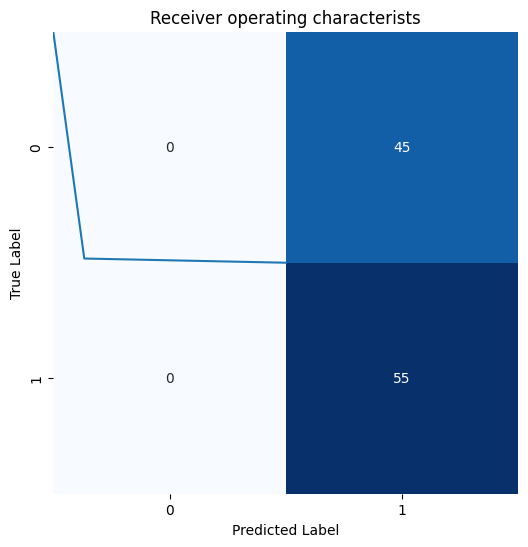

Accuracy of  SGD 0.71
Precision of   SGD 0.6666666666666666
Recall of  SGD 0.9454545454545454
roc_auc of  SGD 0.6838383838383839


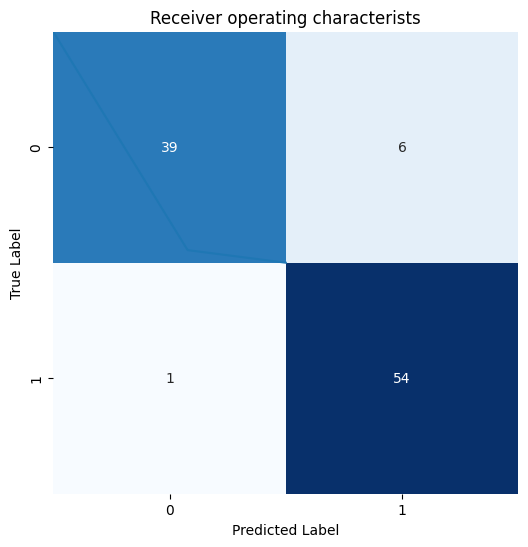

Accuracy of  NB 0.79
Precision of   NB 0.9473684210526315
Recall of  NB 0.6545454545454545
roc_auc of  NB 0.805050505050505


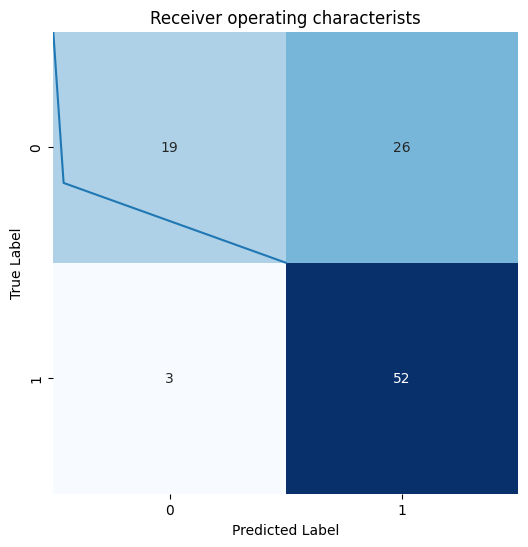

Accuracy of  MLP 0.77
Precision of   MLP 0.7580645161290323
Recall of  MLP 0.8545454545454545
roc_auc of  MLP 0.7606060606060607


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


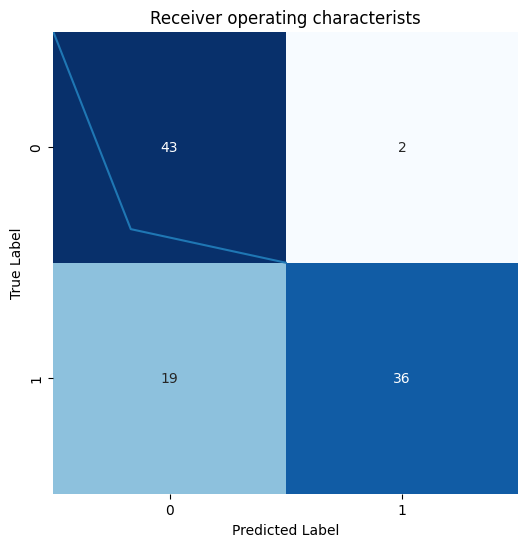

Accuracy of  LR 0.83
Precision of   LR 0.7878787878787878
Recall of  LR 0.9454545454545454
roc_auc of  LR 0.8171717171717172


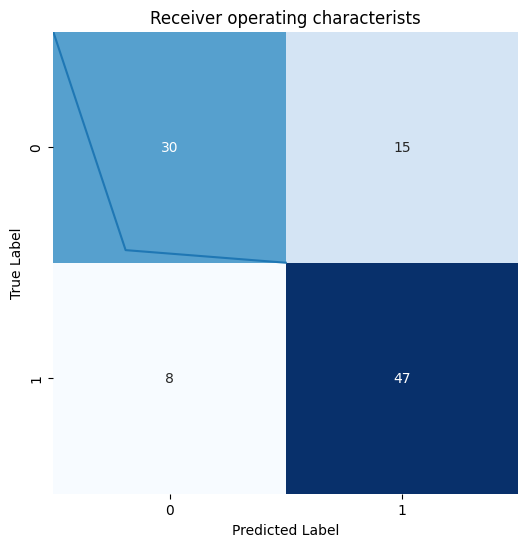

Accuracy of  LDA 0.84
Precision of   LDA 0.8545454545454545
Recall of  LDA 0.8545454545454545
roc_auc of  LDA 0.8383838383838383


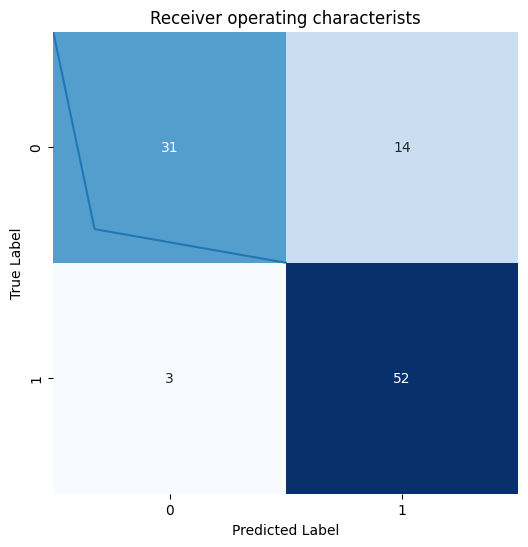

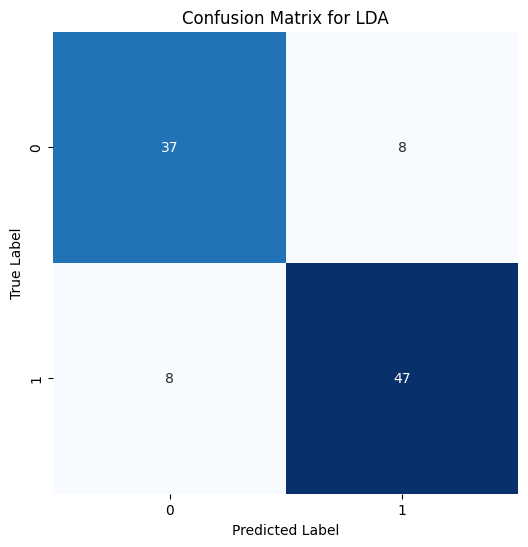

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier(n_neighbors =5)))
models.append(('SGD', OneVsRestClassifier(SGDClassifier())))
models.append(('NB', GaussianNB()))
models.append(('MLP', MLPClassifier()))
models.append(('LR', LogisticRegression(max_iter=1500)))
models.append(('LDA', LinearDiscriminantAnalysis()))

for name, model in models:
  model.fit(X_train, y_train)
  y_pred= model.predict(X_test)
  accuracy= accuracy_score(y_test,y_pred)
  print("Accuracy of ",name, accuracy)
  precision= precision_score(y_test,y_pred)
  recall= recall_score(y_test,y_pred)

  fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
  roc_auc=metrics.auc(fpr,tpr)

  print("Precision of  ",name, precision)
  print("Recall of ",name, recall)
  print("roc_auc of ",name, roc_auc)
  plt.title('Receiver operating characterists')
  plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
  plt.plot
  plt.show()




  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(6, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix for "+ name)
plt.show()

### **All Algorithms**

# AUC - ROC Curve

In [49]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.8383838383838383

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

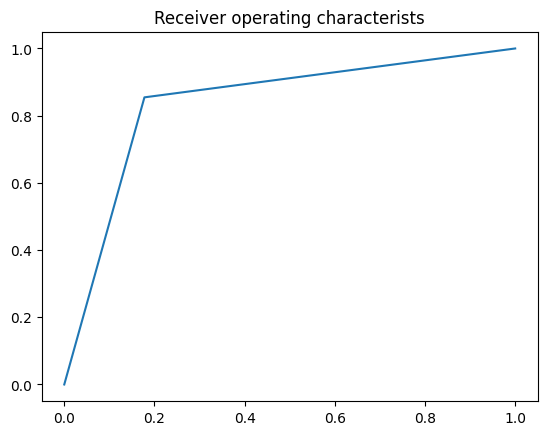

In [50]:
plt.title('Receiver operating characterists')
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.plot

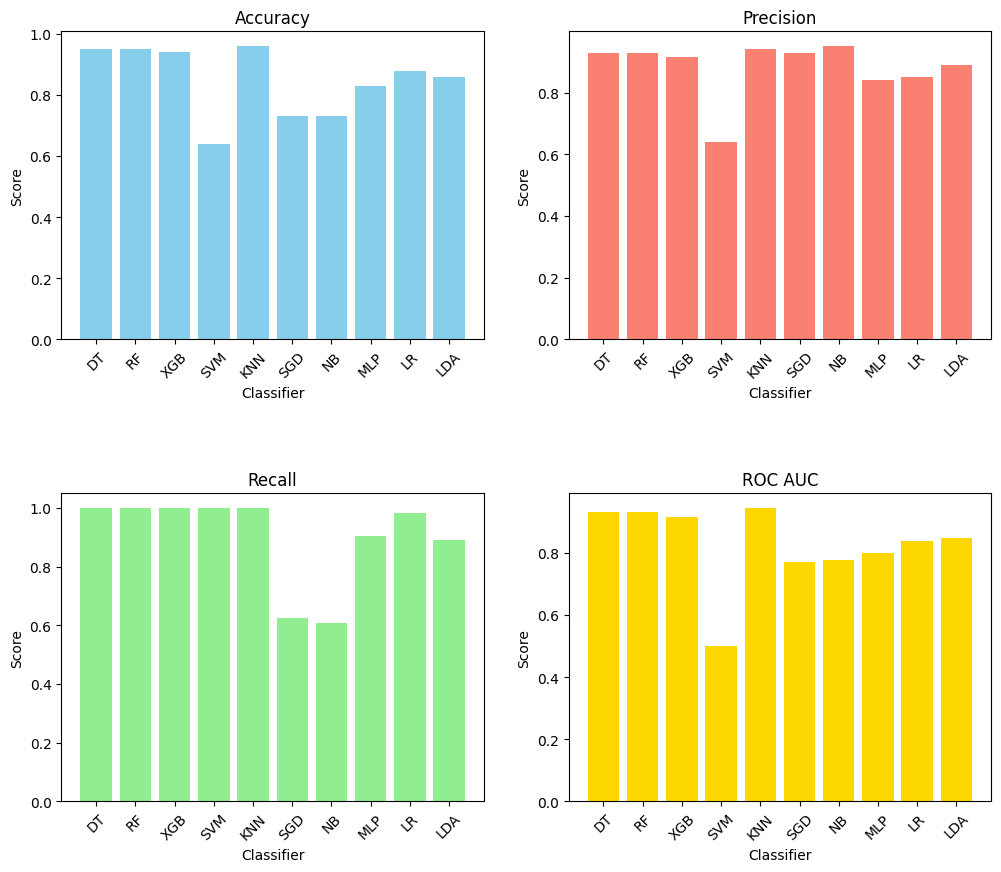

In [51]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['DT', 'RF', 'XGB', 'SVM', 'KNN', 'SGD', 'NB', 'MLP', 'LR', 'LDA']

# Results data
accuracy = [0.95, 0.95, 0.94, 0.64, 0.96, 0.73, 0.73, 0.83, 0.88, 0.86]
precision = [0.927536231884058, 0.927536231884058, 0.9142857142857143, 0.64, 0.9411764705882353, 0.9302325581395349, 0.9512195121951219, 0.8405797101449275, 0.8513513513513513, 0.890625]
recall = [1.0, 1.0, 1.0, 1.0, 1.0, 0.625, 0.609375, 0.90625, 0.984375, 0.890625]
roc_auc = [0.9305555555555556, 0.9305555555555556, 0.9166666666666667, 0.5, 0.9444444444444444, 0.7708333333333333, 0.7769097222222222, 0.8003472222222222, 0.8394097222222222, 0.8480902777777778]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# Accuracy
axs[0, 0].bar(classifiers, accuracy, color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('Classifier')
axs[0, 0].set_ylabel('Score')

# Precision
axs[0, 1].bar(classifiers, precision, color='salmon')
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlabel('Classifier')
axs[0, 1].set_ylabel('Score')

# Recall
axs[1, 0].bar(classifiers, recall, color='lightgreen')
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Classifier')
axs[1, 0].set_ylabel('Score')

# ROC AUC
axs[1, 1].bar(classifiers, roc_auc, color='gold')
axs[1, 1].set_title('ROC AUC')
axs[1, 1].set_xlabel('Classifier')
axs[1, 1].set_ylabel('Score')

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.tick_params(axis='x', rotation=45)

plt.show()

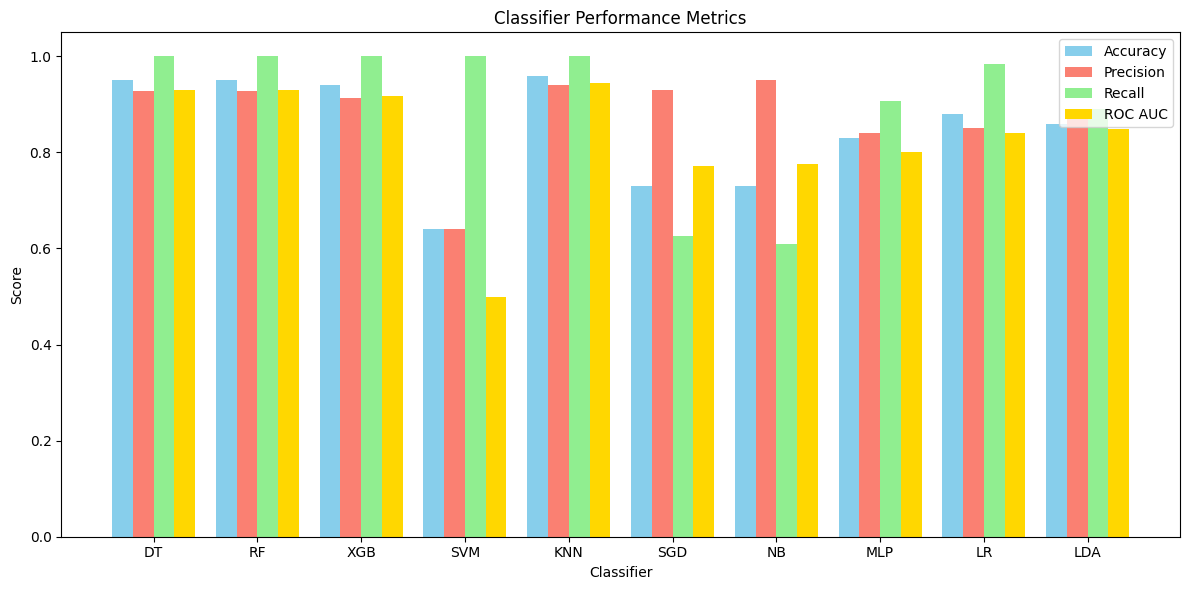

In [52]:
import numpy as np

# Classifier names
classifiers = ['DT', 'RF', 'XGB', 'SVM', 'KNN', 'SGD', 'NB', 'MLP', 'LR', 'LDA']

# Results data
accuracy = [0.95, 0.95, 0.94, 0.64, 0.96, 0.73, 0.73, 0.83, 0.88, 0.86]
precision = [0.927536231884058, 0.927536231884058, 0.9142857142857143, 0.64, 0.9411764705882353, 0.9302325581395349, 0.9512195121951219, 0.8405797101449275, 0.8513513513513513, 0.890625]
recall = [1.0, 1.0, 1.0, 1.0, 1.0, 0.625, 0.609375, 0.90625, 0.984375, 0.890625]
roc_auc = [0.9305555555555556, 0.9305555555555556, 0.9166666666666667, 0.5, 0.9444444444444444, 0.7708333333333333, 0.7769097222222222, 0.8003472222222222, 0.8394097222222222, 0.8480902777777778]

# Set the width of the bars
bar_width = 0.2
index = np.arange(len(classifiers))

# Plotting
plt.figure(figsize=(12, 6))

plt.bar(index - bar_width, accuracy, bar_width, label='Accuracy', color='skyblue')
plt.bar(index, precision, bar_width, label='Precision', color='salmon')
plt.bar(index + bar_width, recall, bar_width, label='Recall', color='lightgreen')
plt.bar(index + 2*bar_width, roc_auc, bar_width, label='ROC AUC', color='gold')

plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Classifier Performance Metrics')
plt.xticks(index + bar_width / 2, classifiers)
plt.legend()

plt.tight_layout()
plt.show()
